# GPS pipeline and plotting

adapted from Louisa Maubachs BA thesis scripts

In [1]:

from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

In [10]:

#General data path for all files
GPS_data_path = "F:\\Cyprus_project_overview\\store_cyprus_project\\GPS_data"


#Exploration Session
exploration_session_1 = "Expl_1"

#give the information of the recording file one

GPS_data_path_date_1_1 = "05_09_2023"
GPS_data_path_recording_name_1_1 = "Expl_1_ET_1_2023-09-05_11-56-16_GPS"
GPS_data_path_pos_file_name_1_1 = "reach_rover_raw_202309050852"

#give the information of the recording file two 
GPS_data_path_date_1_2 = "05_09_2023"
GPS_data_path_recording_name_1_2 = "Expl_1_ET_2_2023-09-05_12-34-24_GPS"
GPS_data_path_pos_file_name_1_2 = "reach_rover_raw_202309050931"

#give the information of the recording file three 
GPS_data_path_date_1_3 = "05_09_2023"
GPS_data_path_recording_name_1_3 = "Expl_1_ET_3_2023-09-05_13-10-01_GPS"
GPS_data_path_pos_file_name_1_3 = "reach_rover_raw_202309051007"

#calibration slicing excluding the calibration procedure -> only exploration phase 
df_1_1_cal_1 = 3530
df_1_1_cal_2 = 6090
df_1_2_cal_1 = 2570
df_1_2_cal_2 = 5540
df_1_3_cal_1 = 2245
df_1_3_cal_2 = 5295

#----------------------------------------------------------------------

#Exploration Session
exploration_session_2 = "Expl_2"
 
#give the information of the recording file one

GPS_data_path_date_2_1 = "06_09_2023"
GPS_data_path_recording_name_2_1 = "Expl_2_ET_1_2023-09-06_10-36-37_GPS"
GPS_data_path_pos_file_name_2_1 = "reach_rover_raw_202309060733"

#give the information of the recording file two 
GPS_data_path_date_2_2 = "06_09_2023"
GPS_data_path_recording_name_2_2 = "Expl_2_ET_2_2023-09-06_11-08-36_GPS"
GPS_data_path_pos_file_name_2_2 = "reach_rover_raw_202309060807"

#calibration slicing excluding the calibration procedure -> only exploration phase 
df_2_1_cal_1 = 2592
df_2_1_cal_2 = 5595
df_2_2_cal_1 = 1901
df_2_2_cal_2 = 5012


#----------------------------------------------------------------------

#Exploration Session
exploration_session_3 = "Expl_3"

#give the information of the recording file one

GPS_data_path_date_3_1 = "06_09_2023"
GPS_data_path_recording_name_3_1 = "Expl_3_ET_1_2023-09-06_13-24-43_GPS"
GPS_data_path_pos_file_name_3_1 = "reach_rover_raw_202309061021"

#give the information of the recording file two 
GPS_data_path_date_3_2 = "06_09_2023"
GPS_data_path_recording_name_3_2 = "Expl_3_ET_2_2023-09-06_13-57-57_GPS"
GPS_data_path_pos_file_name_3_2 = "reach_rover_raw_202309061056"

#give the information of the recording file three 
GPS_data_path_date_3_3 = "06_09_2023"
GPS_data_path_recording_name_3_3 = "Expl_3_ET_3_2023-09-06_14-28-39_GPS"
GPS_data_path_pos_file_name_3_3 = "reach_rover_raw_202309061126"

#calibration slicing excluding the calibration procedure -> only exploration phase 
df_3_1_cal_1 = 2550
df_3_1_cal_2 = 5340
df_3_2_cal_1 = 2054
df_3_2_cal_2 = 4710
df_3_3_cal_1 = 1246
df_3_3_cal_2 = 4126

#---------------------------------------------------------------------

#Exploration Session
exploration_session_4 = "Expl_4"
 
#give the information of the recording file one

GPS_data_path_date_4_1 = "06_09_2023"
GPS_data_path_recording_name_4_1 = "Expl_4_ET_1_2023-09-06_18-31-33_GPS"
GPS_data_path_pos_file_name_4_1 = "reach_rover_raw_202309061529"

#give the information of the recording file two 
GPS_data_path_date_4_2 = "06_09_2023"
GPS_data_path_recording_name_4_2 = "Expl_4_ET_2_2023-09-06_18-57-24_GPS"
GPS_data_path_pos_file_name_4_2 = "reach_rover_raw_202309061555"

#calibration slicing excluding the calibration procedure -> only exploration phase 
df_4_1_cal_1 = 1896
df_4_1_cal_2 = 4932
df_4_2_cal_1 = 1903
df_4_2_cal_2 = 4864

#----------------------------------------------------------------------

#Exploration Session
exploration_session_5 = "Expl_5"
 
#give the information of the recording file one

GPS_data_path_date_5_1 = "07_09_2023"
GPS_data_path_recording_name_5_1 = "Expl_5_ET_1_2023-09-07_18-17-19_GPS"
GPS_data_path_pos_file_name_5_1 = "reach_rover_raw_202309071514"

#give the information of the recording file two 
GPS_data_path_date_5_2 = "07_09_2023"
GPS_data_path_recording_name_5_2 = "Expl_5_ET_2_2023-09-07_18-48-26_GPS"
GPS_data_path_pos_file_name_5_2 = "reach_rover_raw_202309071546"

#calibration slicing excluding the calibration procedure -> only exploration phase 
df_5_1_cal_1 = 2522
df_5_1_cal_2 = 5246
df_5_2_cal_1 = 2214
df_5_2_cal_2 = 4682


In [23]:

###define all files 
#put together the information about the recording file 
GPS_data_1_1 = GPS_data_path + "\\" + GPS_data_path_date_1_1 + "\\" + GPS_data_path_recording_name_1_1 + "\\" + GPS_data_path_pos_file_name_1_1 + ".pos"

#put together the information about the recording file 2
GPS_data_1_2 = GPS_data_path + "\\" + GPS_data_path_date_1_2 + "\\" + GPS_data_path_recording_name_1_2 + "\\" + GPS_data_path_pos_file_name_1_2 + ".pos"

#put together the information about the recording files 3
GPS_data_1_3 = GPS_data_path + "\\" + GPS_data_path_date_1_3 + "\\" + GPS_data_path_recording_name_1_3 + "\\" + GPS_data_path_pos_file_name_1_3 + ".pos"

#put together the information about the recording file 
GPS_data_2_1 = GPS_data_path + "\\" + GPS_data_path_date_2_1 + "\\" + GPS_data_path_recording_name_2_1 + "\\" + GPS_data_path_pos_file_name_2_1 + ".pos"

#put together the information about the recording file 2
GPS_data_2_2 = GPS_data_path + "\\" + GPS_data_path_date_2_2 + "\\" + GPS_data_path_recording_name_2_2 + "\\" + GPS_data_path_pos_file_name_2_2 + ".pos"

#put together the information about the recording files 3
GPS_data_3_1 = GPS_data_path + "\\" + GPS_data_path_date_3_1 + "\\" + GPS_data_path_recording_name_3_1 + "\\" + GPS_data_path_pos_file_name_3_1 + ".pos"

#put together the information about the recording file 
GPS_data_3_2 = GPS_data_path + "\\" + GPS_data_path_date_3_2 + "\\" + GPS_data_path_recording_name_3_2 + "\\" + GPS_data_path_pos_file_name_3_2 + ".pos"

#put together the information about the recording file 2
GPS_data_3_3 = GPS_data_path + "\\" + GPS_data_path_date_3_3 + "\\" + GPS_data_path_recording_name_3_3 + "\\" + GPS_data_path_pos_file_name_3_3 + ".pos"

#put together the information about the recording files 3
GPS_data_4_1 = GPS_data_path + "\\" + GPS_data_path_date_4_1 + "\\" + GPS_data_path_recording_name_4_1 + "\\" + GPS_data_path_pos_file_name_4_1 + ".pos"

#put together the information about the recording file 
GPS_data_4_2 = GPS_data_path + "\\" + GPS_data_path_date_4_2 + "\\" + GPS_data_path_recording_name_4_2 + "\\" + GPS_data_path_pos_file_name_4_2 + ".pos"

#put together the information about the recording file 2
GPS_data_5_1 = GPS_data_path + "\\" + GPS_data_path_date_5_1 + "\\" + GPS_data_path_recording_name_5_1 + "\\" + GPS_data_path_pos_file_name_5_1 + ".pos"

#put together the information about the recording files 3
GPS_data_5_2 = GPS_data_path + "\\" + GPS_data_path_date_5_2 + "\\" + GPS_data_path_recording_name_5_2 + "\\" + GPS_data_path_pos_file_name_5_2 + ".pos"






In [13]:

#converting .pos file to dataframe
def pos_to_dataframe(file):
    """
    Converts .pos data to dataframe with timestamp, latitude, longitude and height

    """
    df = pd.read_table(file, sep="\s+", header=9, parse_dates={"Timestamp": [0, 1]})
    df = df.rename(
        columns={
            "Timestamp": "time",
            "longitude(deg)": "longitude",
            "latitude(deg)": "latitude",
        }
    )
    return df


In [14]:
# assign the dataframes outside of the function 
df_1_1 = pos_to_dataframe(GPS_data_1_1)
df_1_2 = pos_to_dataframe(GPS_data_1_2)
df_1_3 = pos_to_dataframe(GPS_data_1_3)
df_2_1 = pos_to_dataframe(GPS_data_2_1)
df_2_2 = pos_to_dataframe(GPS_data_2_2)
df_3_1 = pos_to_dataframe(GPS_data_3_1)
df_3_2 = pos_to_dataframe(GPS_data_3_2)
df_3_3 = pos_to_dataframe(GPS_data_3_3)
df_4_1 = pos_to_dataframe(GPS_data_4_1)
df_4_2 = pos_to_dataframe(GPS_data_4_2)
df_5_1 = pos_to_dataframe(GPS_data_5_1)
df_5_2 = pos_to_dataframe(GPS_data_5_2)

#concetenate all for plotting
df_all_uncleaned = pd.concat([df_1_1,
                              df_1_2,
                              df_1_3,
                              df_2_1,
                              df_2_2,
                              df_3_1,
                              df_3_2,
                              df_3_3,
                              df_4_1,
                              df_4_2,
                              df_5_1,
                              df_5_2
                              ],ignore_index=True)


#slice the dataframes by ther calibration points end of cal1 and start of cal2
df_1_1_sliced = df_1_1[df_1_1_cal_1:df_1_1_cal_2]
df_1_2_sliced = df_1_2[df_1_2_cal_1:df_1_2_cal_2]
df_1_3_sliced = df_1_3[df_1_3_cal_1:df_1_3_cal_2]
df_2_1_sliced = df_2_1[df_2_1_cal_1:df_2_1_cal_2]
df_2_2_sliced = df_2_2[df_2_2_cal_1:df_2_2_cal_2]
df_3_1_sliced = df_3_1[df_3_1_cal_1:df_3_1_cal_2]
df_3_2_sliced = df_3_2[df_3_2_cal_1:df_3_2_cal_2]
df_3_3_sliced = df_3_3[df_3_3_cal_1:df_3_3_cal_2]
df_4_1_sliced = df_4_1[df_4_1_cal_1:df_4_1_cal_2]
df_4_2_sliced = df_4_2[df_4_2_cal_1:df_4_2_cal_2]
df_5_1_sliced = df_5_1[df_5_1_cal_1:df_5_1_cal_2]
df_5_2_sliced = df_5_2[df_5_2_cal_1:df_5_2_cal_2]



In [15]:

#----------------------------------------------------------------------------------
# Try out block for cleaning and interpolating 

def speed(df):
    
    """
    iterate through dataframe and calculate the distance from one timestamp to the next
    
    calculate the mean and median of the distances depending on the given Q values 
    
    build the new dataframe and include the column distance 
    
    

    """
    #create empty lists
    list_dist = []
    list_lat = []
    list_long = []
    list_time = []
    list_Q = []
    list_ns = []
    list_time_passed = []
    list_dist_div_time = []
    list_km_h = []
    
    #iterate through length of dataframe (-1 because you use i+1)
    for i, row in df.iloc[:len(df)-1].iterrows():
        #define points 
        point1 = df.latitude[i], df.longitude[i]
        point2 = df.latitude[i+1], df.longitude[i+1]
        #earth radius
        radius = 6371 #km 
        
        #define two points
        lat1, lon1 = point1
        lat2, lon2 = point2
        
        #Haversine distance formula 
        dlat = math.radians(lat2-lat1)
        dlon = math.radians(lon2-lon1)
        a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
            * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        d = radius * c
        e = d * 1000 # to give result in meters
        f = e * 100 # tp give result in centimeters
        
        #calculate the time passed from one to the next timestamp 
        t_timestamp = df.time[i+1] - df.time[i]
        #convert it to float (and milliseconds)
        t = t_timestamp.total_seconds() * 1000
        
        #divide distance by time passed
        dist_div_time = f/t        
        
        #calculate dist/time to from cm/ms to km/h
        speed_km_h = dist_div_time * 36
        
        # Format the datetime object with milliseconds as a string
        #time_string = df.time[i].strftime('%Y-%m-%d %H:%M:%S.%f')
        
                         
        
        #create result lists calculated distances, latitude, longitude
        list_dist.append(f)
        list_lat.append(df.latitude[i])
        list_long.append(df.longitude[i])
        #list_time.append(time_string)
        list_time.append(df.time[i])
        list_Q.append(df.Q[i])
        list_ns.append(df.ns[i])
        list_time_passed.append(t)
        list_dist_div_time.append(dist_div_time)
        list_km_h.append(speed_km_h)
        
        
    #create pandas series 
    se_dist = pd.Series(list_dist, name = "distances")
    se_lat = pd.Series(list_lat, name = "latitude")
    se_long = pd.Series(list_long, name = "longitude")
    se_time = pd.Series(list_time, name = "time")
    se_Q = pd.Series(list_Q, name = "Q")
    se_ns = pd.Series(list_ns, name = "ns")
    se_time_passed = pd.Series(list_time_passed, name = "time_passed")
    se_dist_div_time = pd.Series(list_dist_div_time, name = "dist_time")
    se_km_h = pd.Series(list_km_h, name = "km_h")
    

    
    #create dataframe from series 
    df_distances = pd.concat([se_time, se_lat, se_long, se_dist, se_time_passed, se_dist_div_time, se_km_h, se_Q, se_ns], axis=1)
    
    return df_distances

In [16]:
     
# define the dataframes out of the function to further use it 
df_conc_speed_1_1 = speed(df_1_1_sliced)
df_conc_speed_1_2 = speed(df_1_2_sliced)
df_conc_speed_1_3 = speed(df_1_3_sliced)
df_conc_speed_2_1 = speed(df_2_1_sliced)
df_conc_speed_2_2 = speed(df_2_2_sliced)
df_conc_speed_3_1 = speed(df_3_1_sliced)
df_conc_speed_3_2 = speed(df_3_2_sliced)
df_conc_speed_3_3 = speed(df_3_3_sliced)
df_conc_speed_4_1 = speed(df_4_1_sliced)
df_conc_speed_4_2 = speed(df_4_2_sliced)
df_conc_speed_5_1 = speed(df_5_1_sliced)
df_conc_speed_5_2 = speed(df_5_2_sliced)

#concat the dataframes with the speed of all recording sessions
df_concated_speed = pd.concat([df_conc_speed_1_1,
                               df_conc_speed_1_2,
                               df_conc_speed_1_3,
                               df_conc_speed_2_1,
                               df_conc_speed_2_2,
                               df_conc_speed_3_1,
                               df_conc_speed_3_2,
                               df_conc_speed_3_3,
                               df_conc_speed_4_1,
                               df_conc_speed_4_2,
                               df_conc_speed_5_1,
                               df_conc_speed_5_2
                               ], ignore_index=True)


#--------------------------------------------------------------------------

In [17]:

def clean(df):
    """
    cleanes the given dataframe by requirements
    sets values to nan, if requirements are met
    
    """
    for i in range(0,len(df)-1):
        #try out code from online
        ####you have to change the dataframe accordingly, such that it again contains all columns 
        #maybe try put it in another for loop later and switch df to df_distances or whatever it is 
        if df.Q[i] == 5 or df.km_h[i] >= 6 or df.ns[i] < 5:
            # Set specific columns to None when Q is 5
            df.loc[i, 'latitude'] = np.nan
            df.loc[i, 'longitude'] = np.nan
            df.loc[i, "distances"] = np.nan
            df.loc[i, "time_passed"] = np.nan
            df.loc[i, "dist_time"] = np.nan
            df.loc[i, "km_h"] = np.nan
    
    return df

In [18]:

# define the dataframe out of the function to further use it 
df_conc_clean_1_1 = clean(df_conc_speed_1_1)
df_conc_clean_1_2 = clean(df_conc_speed_1_2)
df_conc_clean_1_3 = clean(df_conc_speed_1_3)
df_conc_clean_2_1 = clean(df_conc_speed_2_1)
df_conc_clean_2_2 = clean(df_conc_speed_2_2)
df_conc_clean_3_1 = clean(df_conc_speed_3_1)
df_conc_clean_3_2 = clean(df_conc_speed_3_2)
df_conc_clean_3_3 = clean(df_conc_speed_3_3)
df_conc_clean_4_1 = clean(df_conc_speed_4_1)
df_conc_clean_4_2 = clean(df_conc_speed_4_2)
df_conc_clean_5_1 = clean(df_conc_speed_5_1)
df_conc_clean_5_2 = clean(df_conc_speed_5_2)

# make copys to work with in the interpolation function
df_conc_clean_1_1_copy = df_conc_clean_1_1.copy()
df_conc_clean_1_2_copy = df_conc_clean_1_2.copy()
df_conc_clean_1_3_copy = df_conc_clean_1_3.copy()
df_conc_clean_2_1_copy = df_conc_clean_2_1.copy()
df_conc_clean_2_2_copy = df_conc_clean_2_2.copy()
df_conc_clean_3_1_copy = df_conc_clean_3_1.copy()
df_conc_clean_3_2_copy = df_conc_clean_3_2.copy()
df_conc_clean_3_3_copy = df_conc_clean_3_3.copy()
df_conc_clean_4_1_copy = df_conc_clean_4_1.copy()
df_conc_clean_4_2_copy = df_conc_clean_4_2.copy()
df_conc_clean_5_1_copy = df_conc_clean_5_1.copy()
df_conc_clean_5_2_copy = df_conc_clean_5_2.copy()



In [19]:

def interpol(df):
    """
    linearly interpolates the given dataframe 
    
    """
    df['latitude'] = df['latitude'].interpolate(method='linear')
    df['longitude'] = df['longitude'].interpolate(method='linear')
    
    return df

In [20]:

# define the dataframe out of the function to further use it 
df_conc_interpol_1_1 = interpol(df_conc_clean_1_1_copy)
df_conc_interpol_1_2 = interpol(df_conc_clean_1_2_copy)
df_conc_interpol_1_3 = interpol(df_conc_clean_1_3_copy)
df_conc_interpol_2_1 = interpol(df_conc_clean_2_1_copy)
df_conc_interpol_2_2 = interpol(df_conc_clean_2_2_copy)
df_conc_interpol_3_1 = interpol(df_conc_clean_3_1_copy)
df_conc_interpol_3_2 = interpol(df_conc_clean_3_2_copy)
df_conc_interpol_3_3 = interpol(df_conc_clean_3_3_copy)
df_conc_interpol_4_1 = interpol(df_conc_clean_4_1_copy)
df_conc_interpol_4_2 = interpol(df_conc_clean_4_2_copy)
df_conc_interpol_5_1 = interpol(df_conc_clean_5_1_copy)
df_conc_interpol_5_2 = interpol(df_conc_clean_5_2_copy)

#----------------------------------------------------------------------------

In [21]:

#concat the cleaned dataframes of all recording sessions
df_concated_clean = pd.concat([df_conc_clean_1_1,
                               df_conc_clean_1_2,
                               df_conc_clean_1_3,
                               df_conc_clean_2_1,
                               df_conc_clean_2_2,
                               df_conc_clean_3_1,
                               df_conc_clean_3_2,
                               df_conc_clean_3_3,
                               df_conc_clean_4_1,
                               df_conc_clean_4_2,
                               df_conc_clean_5_1,
                               df_conc_clean_5_2
                               ], ignore_index=True)

#concat the interpolated dataframes of all recording sessions
df_concated_interpol = pd.concat([df_conc_interpol_1_1,
                                  df_conc_interpol_1_2,
                                  df_conc_interpol_1_3,
                                  df_conc_interpol_2_1,
                                  df_conc_interpol_2_2,
                                  df_conc_interpol_3_1,
                                  df_conc_interpol_3_2,
                                  df_conc_interpol_3_3,
                                  df_conc_interpol_4_1,
                                  df_conc_interpol_4_2,
                                  df_conc_interpol_5_1,
                                  df_conc_interpol_5_2
                                  ], ignore_index=True)
#---------------------------------------------------------------------------

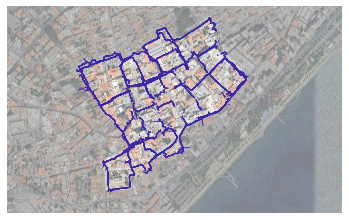

In [32]:

#filepath to save the output image 
filepath_img_general = "F:\\Cyprus_project_overview\\data\\analysis\\gps\\louisasScript"
filename_img_save = "gps_raw"

#assign the cleaned dataframe 
df = df_concated_speed
df_name = "df_concated_speed" # for printing later on plot




#put together the filepath name
filepath_img_save = filepath_img_general + "\\" + filename_img_save + ".png"


#give the information on filepath of map image 
filepath_map_general = "F:\\Cyprus_project_overview\\data\\maps"
filename_map = "Limassol_grey2"

#put together the filepath name
filepath_map = filepath_map_general + "\\" + filename_map + ".jpg"

# Load an image from file
img = Image.open(filepath_map) 



# pixel values map picture 
pixel_width = 8192  # Width of the image in pixels
pixel_height = 5051  # Height of the image in pixels


# latitude and longitude of the edges of the map image 
corner_lat_top = 34.67751  # Latitude of the top edge of the map
corner_lat_bottom = 34.671293  # Latitude of the bottom edge of the map
corner_lon_left = 33.037658  # Longitude of the left edge of the map
corner_lon_right =  33.049882 # Longitude of the right edge of the map

# Calculate differences in latitude and longitude
delta_lat = corner_lat_top - corner_lat_bottom
delta_lon = corner_lon_right - corner_lon_left

# Calculate conversion ratio from degrees to pixels
lat_to_pixel = pixel_height / delta_lat
lon_to_pixel = pixel_width / delta_lon

# Assuming df contains 'latitude' and 'longitude' columns
# Convert GPS coordinates to pixel coordinates
df['x'] = (df['longitude'] - corner_lon_left) * lon_to_pixel
df['y'] = (corner_lat_top - df['latitude']) * lat_to_pixel


# Now, df['x'] and df['y'] contain the pixel coordinates of the GPS points on the image
# Plot these points on the map image
# color= [0.24,0.15,0.66]
plt.imshow(img, alpha=0.6)
plt.scatter(df['x'], df['y'], marker='o', s=1, edgecolors='none', facecolors= [0.24,0.15,0.66])#plt.title("All Exploration Sessions", fontsize=7, loc="center")
# Manually position the title at the lower left corner
#plt.text(5, 5340, df_name, fontsize=6, ha='left', va='top')
#plt.text(5, 5340, "top: " + str(corner_lat_top) + " " + "down: " + str(corner_lat_bottom) + " " + "left: " + str(corner_lon_left) + " " + "right: " + str(corner_lon_right), fontsize=6, ha='left', va='bottom')

# Hide the axes
plt.axis("off")

# Save the figure as an image with a specific DPI
plt.savefig(filepath_img_save, dpi=600, bbox_inches = "tight")  # Set the output file and resolution (dpi)

plt.show()

In [24]:
print(filepath_img_save)

F:\Cyprus_project_overview\data\analysis\gps\louisasScript\gps_raw.png
